# XGBoost

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 CPU 환경에서 빠르게 학습 가능

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

## 파이썬 기반 XGBoost

In [3]:
cancer= load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, test_size =0.2, random_state=123)
dtrain = xgb.DMatrix(data = X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label = y_test)

In [5]:
params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_matric' : 'logloss',
    'early_stopping' : 100
}

num_rounds = 400

In [6]:
evals = [(dtrain, 'train'),(dtest,'eval')]
xgb_model = xgb.train(params= params, dtrain=dtrain, num_boost_round = num_rounds,
                      early_stopping_rounds=100, evals = evals)

[0]	train-error:0.024176	eval-error:0.035088
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 100 rounds.
[1]	train-error:0.024176	eval-error:0.035088
[2]	train-error:0.024176	eval-error:0.026316
[3]	train-error:0.017582	eval-error:0.026316
[4]	train-error:0.01978	eval-error:0.026316
[5]	train-error:0.024176	eval-error:0.026316
[6]	train-error:0.021978	eval-error:0.026316
[7]	train-error:0.015385	eval-error:0.026316
[8]	train-error:0.015385	eval-error:0.026316
[9]	train-error:0.015385	eval-error:0.026316
[10]	train-error:0.013187	eval-error:0.026316
[11]	train-error:0.013187	eval-error:0.026316
[12]	train-error:0.013187	eval-error:0.035088
[13]	train-error:0.010989	eval-error:0.035088
[14]	train-error:0.010989	eval-error:0.035088
[15]	train-error:0.010989	eval-error:0.035088
[16]	train-error:0.010989	eval-error:0.035088
[17]	train-error:0.008791	eval-error:0.035088
[18]	train-error:0.006593	eval-error:

In [8]:
import numpy as np

predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10],3))

[0.999 0.999 0.001 0.994 0.001 0.988 0.994 0.997 0.96  0.802]


In [10]:
preds = [1 if x > 0.5 else 0 for x in predicts]
print(preds[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


In [9]:
print('정확도 : {}'.format(accuracy_score(y_test,predicts)))
print('정밀도 : {}'.format(precision_score(y_test,predicts)))
print('재현율 : {}'.format(recall_score(y_test,predicts)))

ValueError: ignored

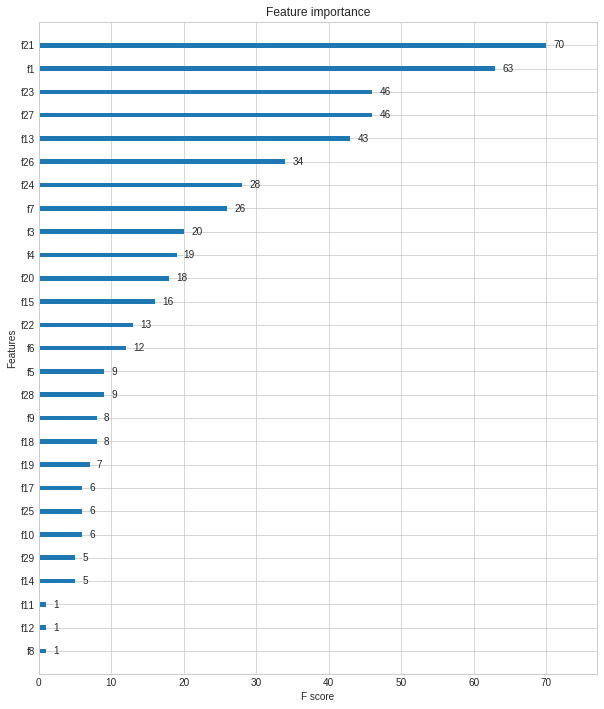

In [12]:
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax = ax);


In [13]:
#트리기반이니까 xgboost는

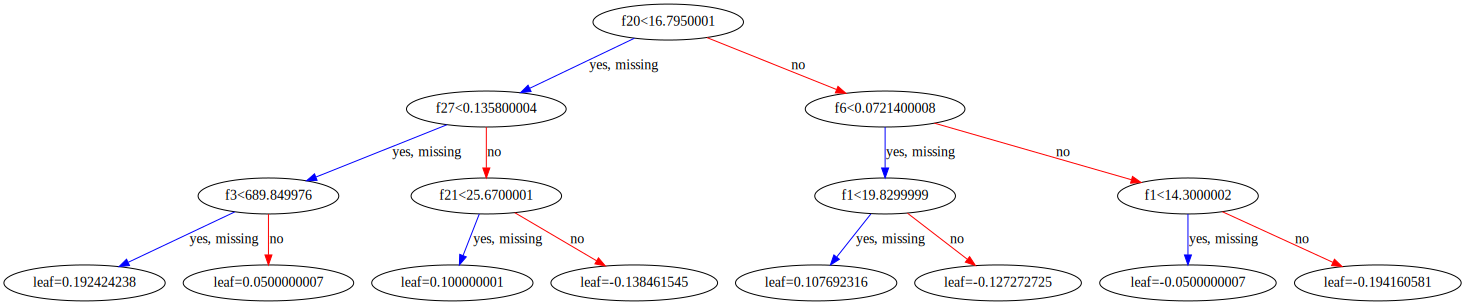

In [14]:
dot_data = xgb.to_graphviz(xgb_model)
graph= graphviz.Source(dot_data)
graph
# max_depth를 3으로 주니까 3분기까지가네

## XGBClassifier

### 붓꽃 데이터

In [15]:
iris = load_iris()
X_train, X_test , y_train, y_test= train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [18]:
xgbc = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds= xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:,1]

In [24]:
cross_val = cross_validate(
    estimator = xgbc,
    X=iris.data ,y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {}) '.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}) '.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/- {}) '.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.053469085693359376 (+/- 0.003101775954050441) 
avg score time: 0.0010736942291259765 (+/- 5.271727542175311e-05) 
avg test time: 0.96 (+/- 0.024944382578492935) 


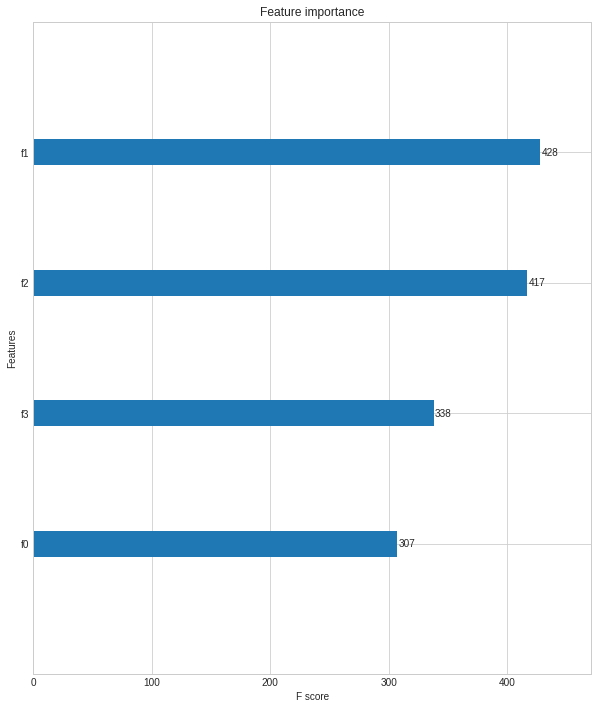

In [25]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc,ax= ax)

# feature 1번이 가장 중요하게 나왔구나!

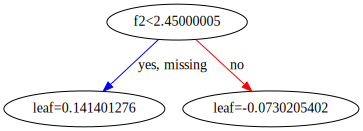

In [26]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

# feature2가 나왔네

### 와인 데이터

### 와인 데이터

In [31]:
wine = load_wine()
X_train, X_test , y_train, y_test= train_test_split(wine.data, wine.target, test_size=0.2, random_state=123)

In [32]:
xgbc = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds= xgbc.predict(X_test)
# preds_proba = xgbc.predict_proba(X_test)[:,1]

In [33]:
cross_val = cross_validate(
    estimator = xgbc,
    X=wine.data ,y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {}) '.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}) '.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/- {}) '.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.08783020973205566 (+/- 0.002922472015627042) 
avg score time: 0.0010456085205078126 (+/- 2.813848352432926e-05) 
avg test time: 0.9609523809523809 (+/- 0.028267341226138717) 


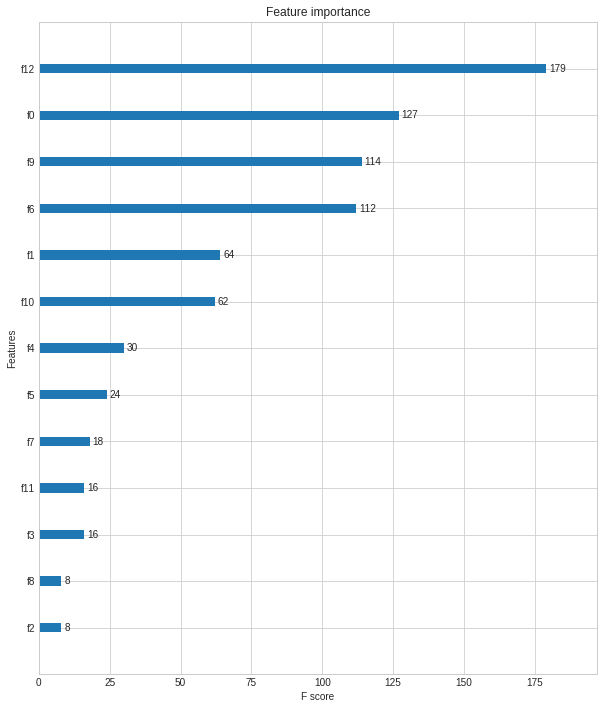

In [34]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc,ax= ax)

# feature 12번이 가장 중요하게 나왔구나!

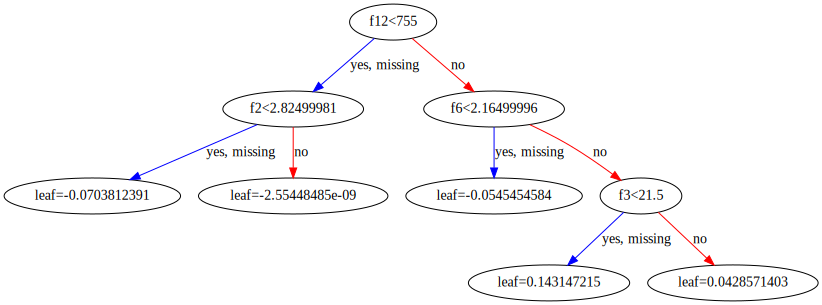

In [35]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

# feature2가 나왔네

### 유방암 데이터

유방암 데이터

In [36]:
cancer = load_breast_cancer()
X_train, X_test , y_train, y_test= train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)

In [37]:
xgbc = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds= xgbc.predict(X_test)
# preds_proba = xgbc.predict_proba(X_test)[:,1]

In [38]:
cross_val = cross_validate(
    estimator = xgbc,
    X=cancer.data ,y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {}) '.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}) '.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/- {}) '.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.22477192878723146 (+/- 0.006185825490454843) 
avg score time: 0.0014876842498779297 (+/- 6.688470245074778e-05) 
avg test time: 0.9736376339077782 (+/- 0.009609619188189153) 


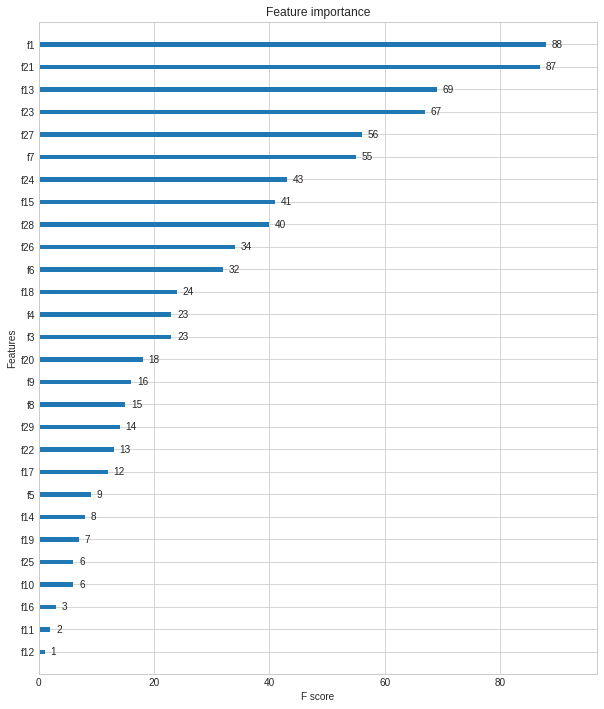

In [39]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc,ax= ax)

# feature 1,21번이 가장 중요하게 나왔구나!

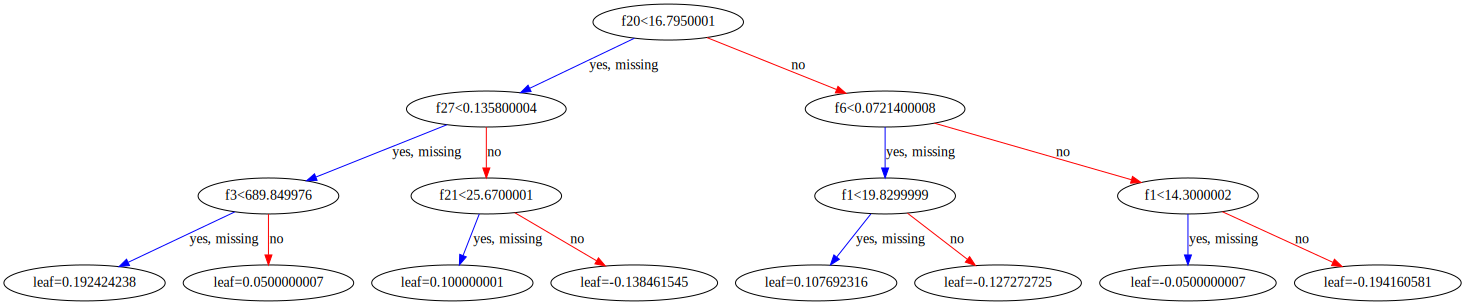

In [40]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

# feature20으로 분기점 시작

## XGBRegressor

### 보스턴 데이터

In [45]:
boston = load_boston()
X_train, X_test , y_train, y_test= train_test_split(boston.data, boston.target, test_size=0.2, random_state=123)

In [46]:
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 0.1, max_depth=3, objective = 'reg:squarederror')
xgbr.fit(X_train, y_train)
preds= xgbr.predict(X_test)
# preds_proba = xgbc.predict_proba(X_test)[:,1]

In [47]:
cross_val = cross_validate(
    estimator = xgbr,
    X=boston.data ,y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {}) '.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}) '.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/- {}) '.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.15815339088439942 (+/- 0.00826685176594412) 
avg score time: 0.0024680614471435545 (+/- 0.0003833269091185412) 
avg test time: 0.6884390572208088 (+/- 0.164997474845101) 


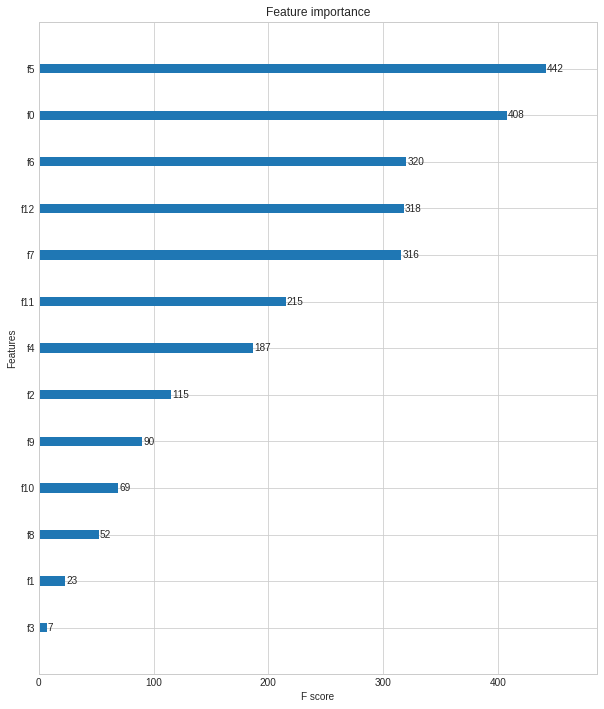

In [48]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbr,ax= ax)

# feature 5번이 가장 중요하게 나왔구나!

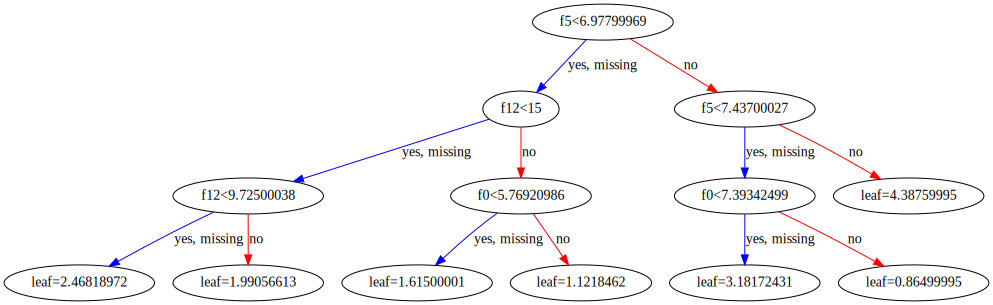

In [49]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

# feature5으로 분기점 시작

### 당뇨병 데이터

In [50]:
diabetes = load_diabetes()
X_train, X_test , y_train, y_test= train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=123)

In [51]:
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 0.1, max_depth=3, objective = 'reg:squarederror')
xgbr.fit(X_train, y_train)
preds= xgbr.predict(X_test)
# preds_proba = xgbc.predict_proba(X_test)[:,1]

In [52]:
cross_val = cross_validate(
    estimator = xgbr,
    X=diabetes.data ,y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {}) '.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}) '.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/- {}) '.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.12352070808410645 (+/- 0.00540914933846413) 
avg score time: 0.002078866958618164 (+/- 6.537515694047603e-05) 
avg test time: 0.3000529025802777 (+/- 0.07589311710543882) 


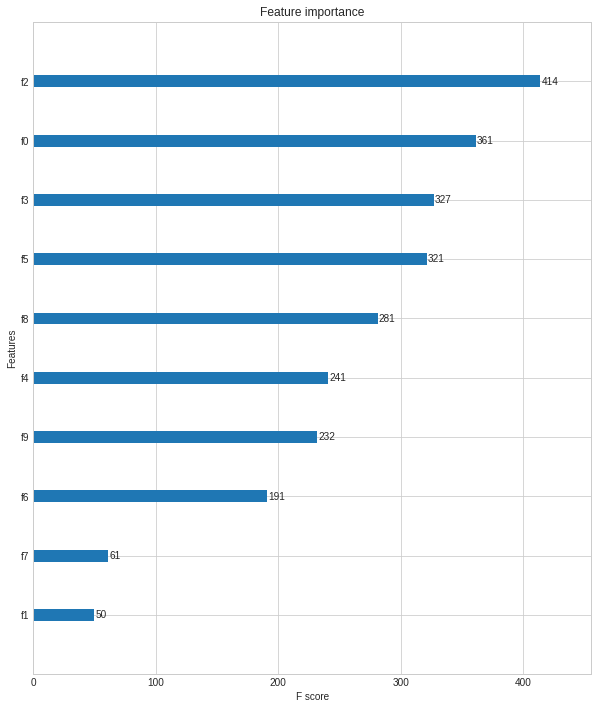

In [53]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbr,ax= ax)

# feature 2번이 가장 중요하게 나왔구나!

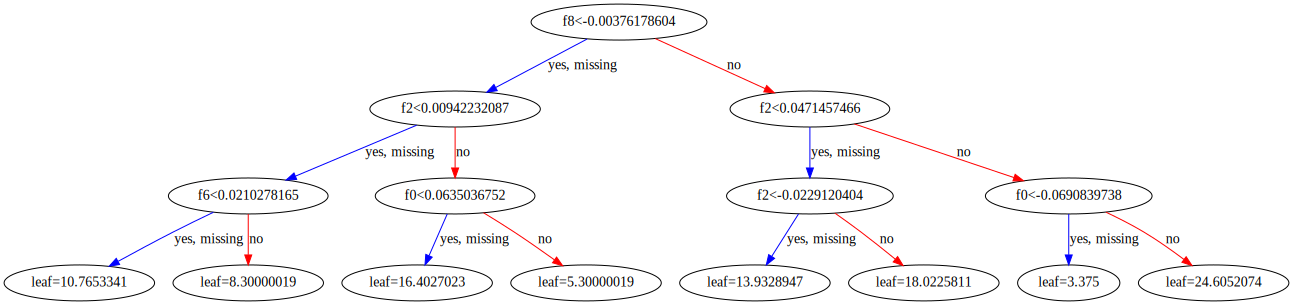

In [54]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

# feature5으로 분기점 시작

# LightGBM

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적 분할

In [55]:
#X gbm보다 2년후에 나옴
# 좀더 업그레이드 됨

from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance,plot_metric, plot_tree# lightgmb으로 from해야함 안그럼 xgbm이랑 충돌남


## LGBMClassifier

### 붓꽃 데이터

In [57]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state = 123)

In [67]:
lgbmc = LGBMClassifier(n_extimators = 400)
evals = [(X_test,y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
# lgbmc.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric= 'logloss', eval_set= evals, verbose = True)
preds = lgbmc.predict(X_test)


[1]	valid_0's multi_logloss: 0.997777	valid_0's multi_logloss: 0.997777
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.895442	valid_0's multi_logloss: 0.895442
[3]	valid_0's multi_logloss: 0.809103	valid_0's multi_logloss: 0.809103
[4]	valid_0's multi_logloss: 0.732391	valid_0's multi_logloss: 0.732391
[5]	valid_0's multi_logloss: 0.669225	valid_0's multi_logloss: 0.669225
[6]	valid_0's multi_logloss: 0.608976	valid_0's multi_logloss: 0.608976
[7]	valid_0's multi_logloss: 0.557876	valid_0's multi_logloss: 0.557876
[8]	valid_0's multi_logloss: 0.513242	valid_0's multi_logloss: 0.513242
[9]	valid_0's multi_logloss: 0.470866	valid_0's multi_logloss: 0.470866
[10]	valid_0's multi_logloss: 0.437898	valid_0's multi_logloss: 0.437898
[11]	valid_0's multi_logloss: 0.403873	valid_0's multi_logloss: 0.403873
[12]	valid_0's multi_logloss: 0.375711	valid_0's multi_logloss: 0.375711
[13]	valid_0's multi_logloss: 0.348203	valid_0's multi_logloss: 0.3482

In [69]:
cross_val = cross_validate(
    estimator = lgbmc,
    X=iris.data ,y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {}) '.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}) '.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/- {}) '.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.021856927871704103 (+/- 0.0040471790074261315) 
avg score time: 0.0009682655334472656 (+/- 4.909047228197343e-05) 
avg test time: 0.9400000000000001 (+/- 0.0573488351136175) 


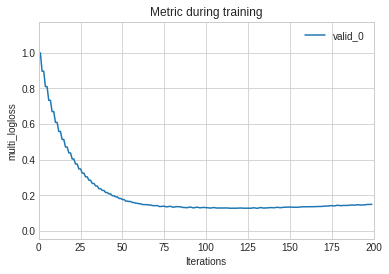

In [70]:
plot_metric(lgbmc)

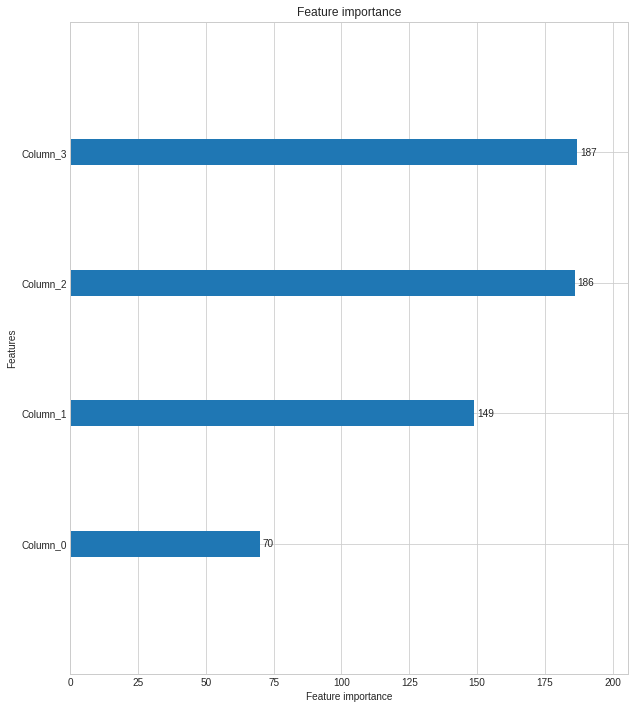

In [71]:
plot_importance(lgbmc, figsize = (10,12))
# columns 3 가 중요 feature이구나

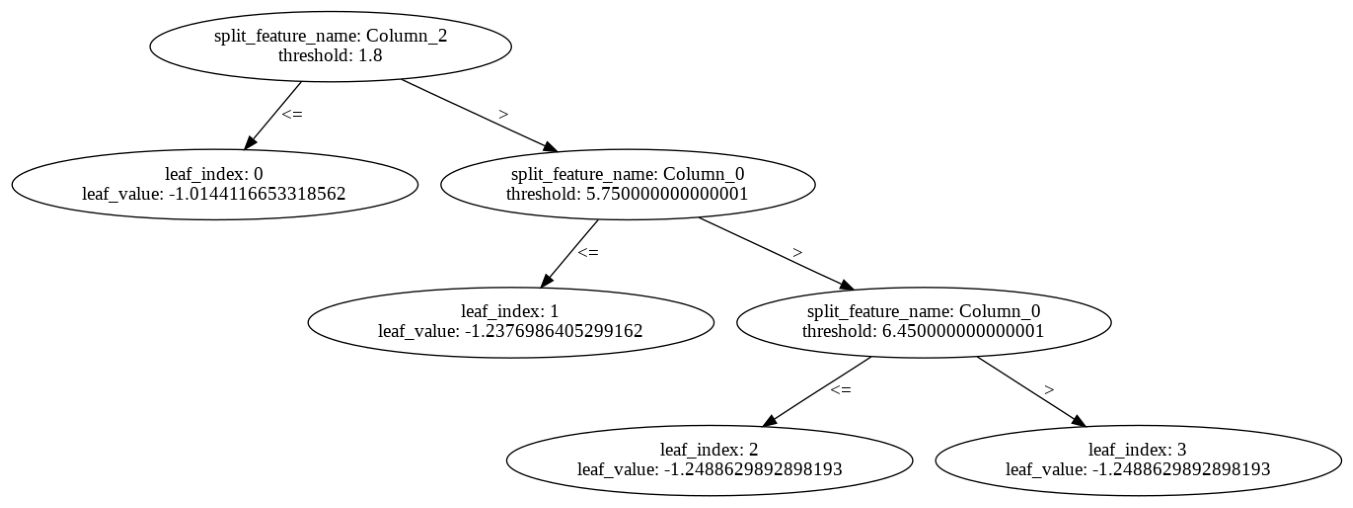

In [72]:
plot_tree(lgbmc, figsize=(24,24))

In [ ]:
#기존엔 벨런스식이지만
#light는 sqeure해지더라도 가볍게

### 와인 데이터

In [73]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state = 123)

In [74]:
lgbmc = LGBMClassifier(n_extimators = 400)
evals = [(X_test,y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
# lgbmc.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric= 'logloss', eval_set= evals, verbose = True)
preds = lgbmc.predict(X_test)


[1]	valid_0's multi_logloss: 1.09587	valid_0's multi_logloss: 1.09587
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.00013	valid_0's multi_logloss: 1.00013
[3]	valid_0's multi_logloss: 0.913552	valid_0's multi_logloss: 0.913552
[4]	valid_0's multi_logloss: 0.843464	valid_0's multi_logloss: 0.843464
[5]	valid_0's multi_logloss: 0.781558	valid_0's multi_logloss: 0.781558
[6]	valid_0's multi_logloss: 0.716933	valid_0's multi_logloss: 0.716933
[7]	valid_0's multi_logloss: 0.656888	valid_0's multi_logloss: 0.656888
[8]	valid_0's multi_logloss: 0.61532	valid_0's multi_logloss: 0.61532
[9]	valid_0's multi_logloss: 0.574294	valid_0's multi_logloss: 0.574294
[10]	valid_0's multi_logloss: 0.533566	valid_0's multi_logloss: 0.533566
[11]	valid_0's multi_logloss: 0.496561	valid_0's multi_logloss: 0.496561
[12]	valid_0's multi_logloss: 0.464202	valid_0's multi_logloss: 0.464202
[13]	valid_0's multi_logloss: 0.430112	valid_0's multi_logloss: 0.430112
[14

In [75]:
cross_val = cross_validate(
    estimator = lgbmc,
    X=wine.data ,y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {}) '.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}) '.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/- {}) '.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.03340482711791992 (+/- 0.0023559346388675475) 
avg score time: 0.0011651039123535157 (+/- 0.00024946958072967083) 
avg test time: 0.9496825396825397 (+/- 0.032178013303907474) 


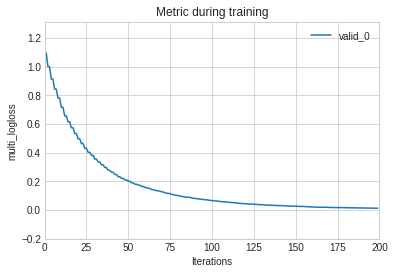

In [76]:
plot_metric(lgbmc)

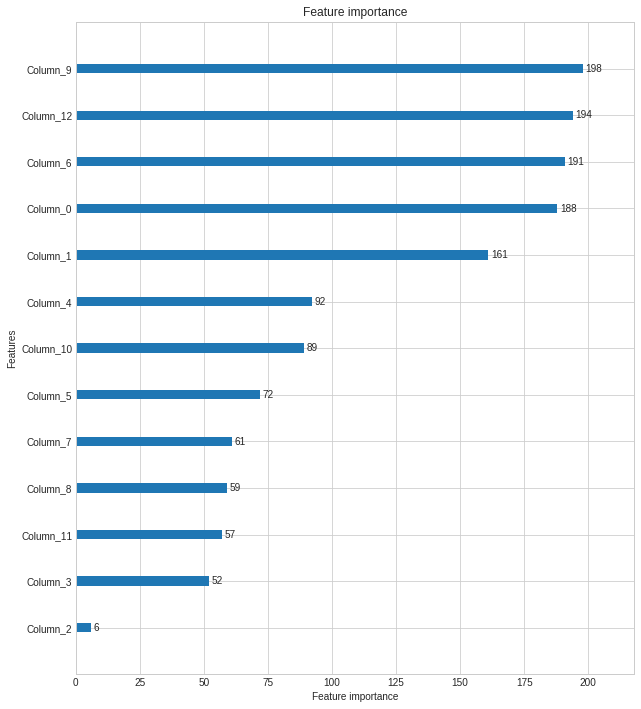

In [77]:
plot_importance(lgbmc, figsize = (10,12))
#  중요 feature이구나
# columns 9를 

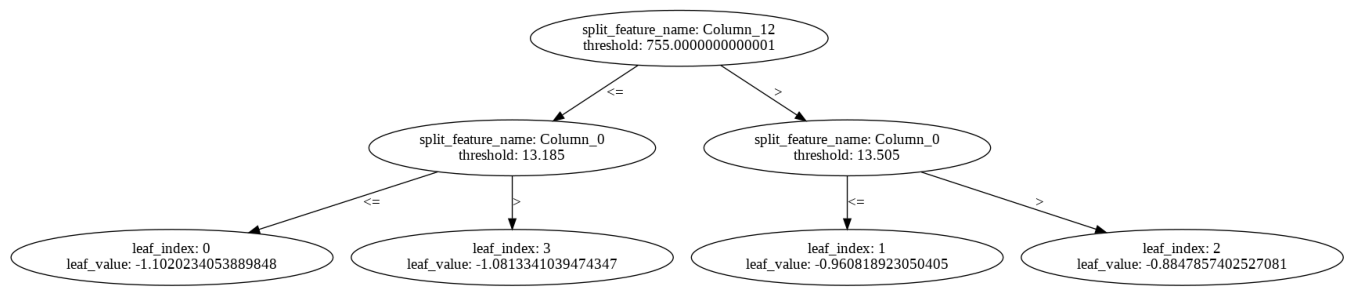

In [78]:
plot_tree(lgbmc, figsize=(24,24))

### 유방암 데이터

In [79]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state = 123)

In [80]:
lgbmc = LGBMClassifier(n_extimators = 400)
evals = [(X_test,y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
# lgbmc.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric= 'logloss', eval_set= evals, verbose = True)
preds = lgbmc.predict(X_test)


[1]	valid_0's binary_logloss: 0.575665	valid_0's binary_logloss: 0.575665
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.513919	valid_0's binary_logloss: 0.513919
[3]	valid_0's binary_logloss: 0.463418	valid_0's binary_logloss: 0.463418
[4]	valid_0's binary_logloss: 0.420506	valid_0's binary_logloss: 0.420506
[5]	valid_0's binary_logloss: 0.383753	valid_0's binary_logloss: 0.383753
[6]	valid_0's binary_logloss: 0.352228	valid_0's binary_logloss: 0.352228
[7]	valid_0's binary_logloss: 0.326437	valid_0's binary_logloss: 0.326437
[8]	valid_0's binary_logloss: 0.302562	valid_0's binary_logloss: 0.302562
[9]	valid_0's binary_logloss: 0.278182	valid_0's binary_logloss: 0.278182
[10]	valid_0's binary_logloss: 0.261933	valid_0's binary_logloss: 0.261933
[11]	valid_0's binary_logloss: 0.245115	valid_0's binary_logloss: 0.245115
[12]	valid_0's binary_logloss: 0.228615	valid_0's binary_logloss: 0.228615
[13]	valid_0's binary_logloss: 0.215537	valid_

In [81]:
cross_val = cross_validate(
    estimator = lgbmc,
    X=wine.data ,y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {}) '.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}) '.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/- {}) '.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.03473992347717285 (+/- 0.005415464714235941) 
avg score time: 0.001082134246826172 (+/- 6.975288301510569e-05) 
avg test time: 0.9496825396825397 (+/- 0.032178013303907474) 


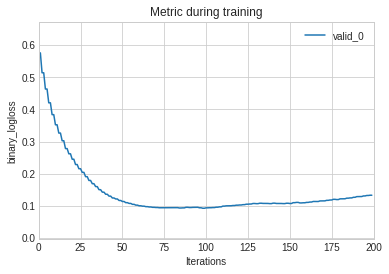

In [82]:
plot_metric(lgbmc)

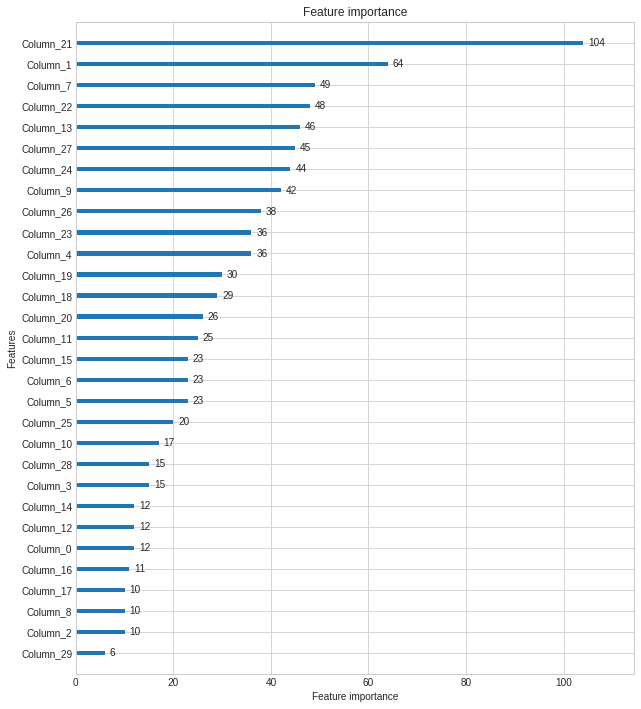

In [83]:
plot_importance(lgbmc, figsize = (10,12))
#  중요 feature이구나
# columns 21를 

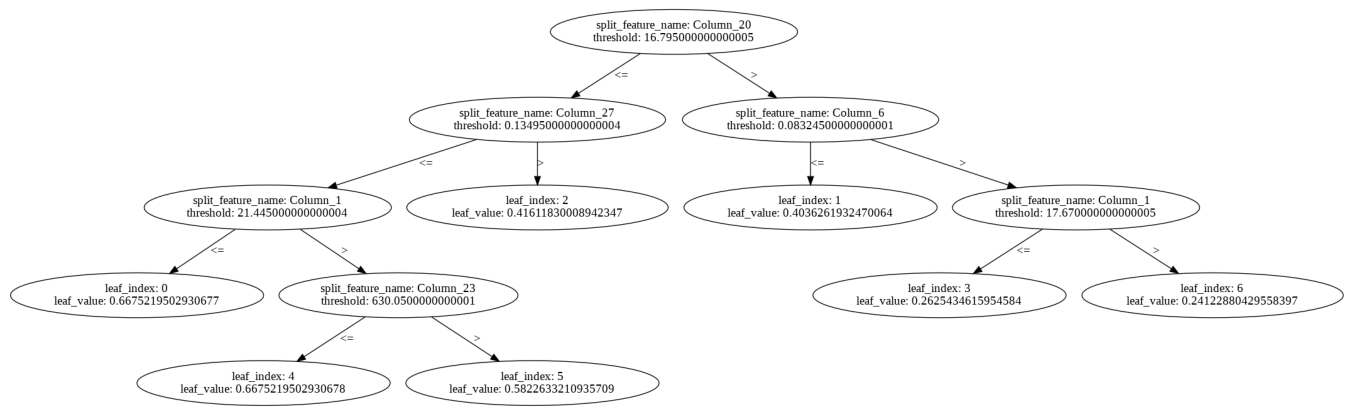

In [84]:
plot_tree(lgbmc, figsize=(24,24))

## LGBMRegressor

의사결정트리 특성상 regressor은 그리 높은 효율은 안나오지만 가능은 하다

### 보스턴 데이터

In [85]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state = 123)

In [88]:
lgbmr = LGBMRegressor(n_extimators = 400)
evals = [(X_test,y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
# lgbmc.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric= 'logloss', eval_set= evals, verbose = True)
preds = lgbmr.predict(X_test)


[1]	valid_0's l2: 71.4897
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	va

In [89]:
cross_val = cross_validate(
    estimator = lgbmr,
    X=boston.data ,y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {}) '.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}) '.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/- {}) '.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.04862332344055176 (+/- 0.004844512470054087) 
avg score time: 0.0016124725341796875 (+/- 0.00022351562626438516) 
avg test time: 0.5799586849005656 (+/- 0.2826507818564849) 


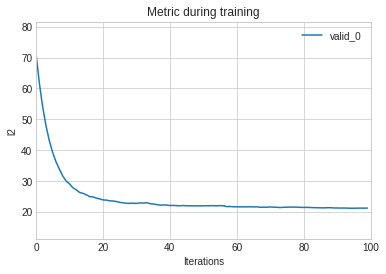

In [90]:
plot_metric(lgbmr)

# light는 loss가 빨리떨어지긴 하지만 20까지밖에 안떨어지는거지

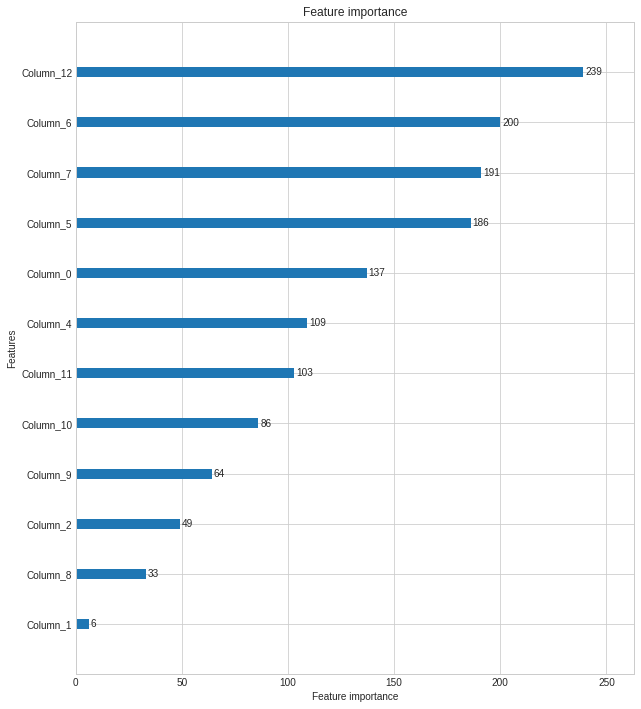

In [91]:
plot_importance(lgbmr, figsize = (10,12))
#  중요 feature이구나
# columns 12를 

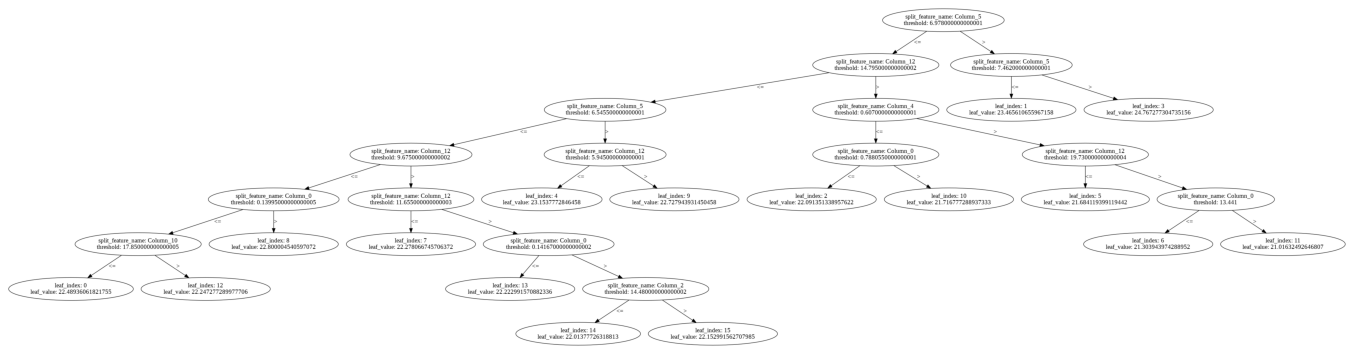

In [92]:
plot_tree(lgbmr, figsize=(24,24))

### 당뇨병 데이터

In [93]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state = 123)

In [94]:
lgbmr = LGBMRegressor(n_extimators = 400)
evals = [(X_test,y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
# lgbmc.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric= 'logloss', eval_set= evals, verbose = True)
preds = lgbmr.predict(X_test)


[1]	valid_0's l2: 5692.17
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 5218.79
[3]	valid_0's l2: 4835.34
[4]	valid_0's l2: 4479.84
[5]	valid_0's l2: 4183.42
[6]	valid_0's l2: 3924.35
[7]	valid_0's l2: 3726.96
[8]	valid_0's l2: 3555.3
[9]	valid_0's l2: 3407.95
[10]	valid_0's l2: 3291.33
[11]	valid_0's l2: 3201.78
[12]	valid_0's l2: 3114.69
[13]	valid_0's l2: 3059.18
[14]	valid_0's l2: 3005.79
[15]	valid_0's l2: 2945.18
[16]	valid_0's l2: 2876.37
[17]	valid_0's l2: 2822.71
[18]	valid_0's l2: 2791.31
[19]	valid_0's l2: 2786.39
[20]	valid_0's l2: 2745.25
[21]	valid_0's l2: 2724.07
[22]	valid_0's l2: 2705.17
[23]	valid_0's l2: 2685.41
[24]	valid_0's l2: 2663.2
[25]	valid_0's l2: 2659.75
[26]	valid_0's l2: 2636.48
[27]	valid_0's l2: 2615.15
[28]	valid_0's l2: 2640.63
[29]	valid_0's l2: 2624.73
[30]	valid_0's l2: 2615.14
[31]	valid_0's l2: 2601.41
[32]	valid_0's l2: 2593.79
[33]	valid_0's l2: 2555.64
[34]	valid_0's l2: 2572.12
[35]	valid_0's l2: 2581.22
[36

In [95]:
cross_val = cross_validate(
    estimator = lgbmr,
    X=boston.data ,y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {}) '.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/- {}) '.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/- {}) '.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg fit time: 0.052779626846313474 (+/- 0.0011751025145067908) 
avg score time: 0.0020276546478271485 (+/- 0.00013420730696052472) 
avg test time: 0.5799586849005656 (+/- 0.2826507818564849) 


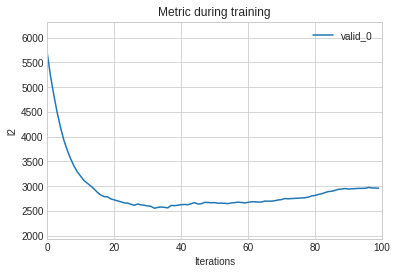

In [96]:
plot_metric(lgbmr)

# light는 loss가 빨리떨어지긴 하지만 20까지밖에 안떨어지는거지

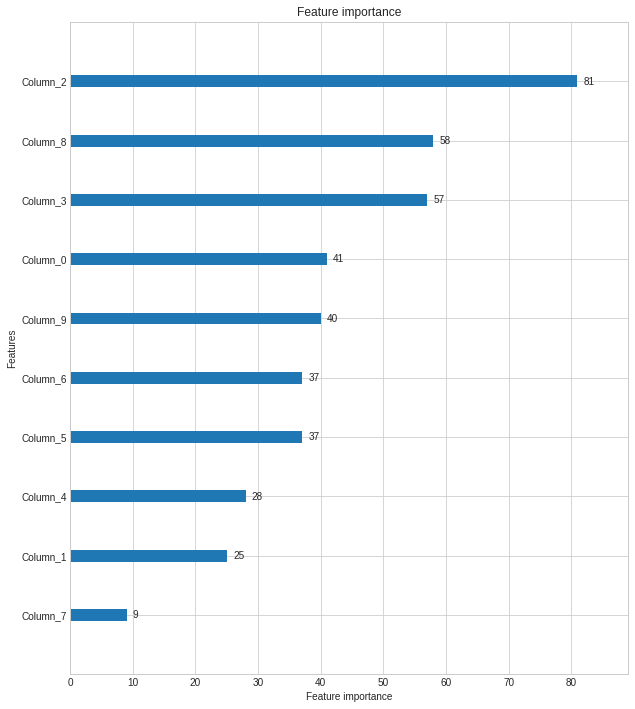

In [97]:
plot_importance(lgbmr, figsize = (10,12))
#  중요 feature이구나
# columns 2를 

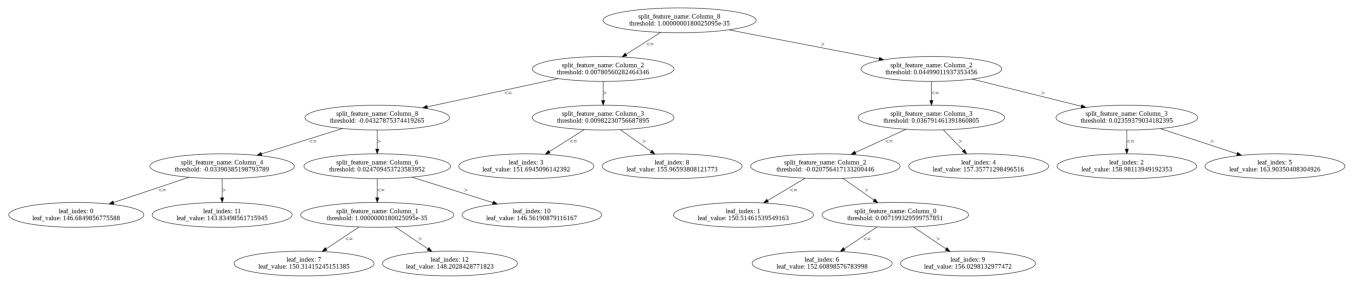

In [98]:
plot_tree(lgbmr, figsize=(24,24))